#Porfilio Trujillo Martinez

###Taller 9

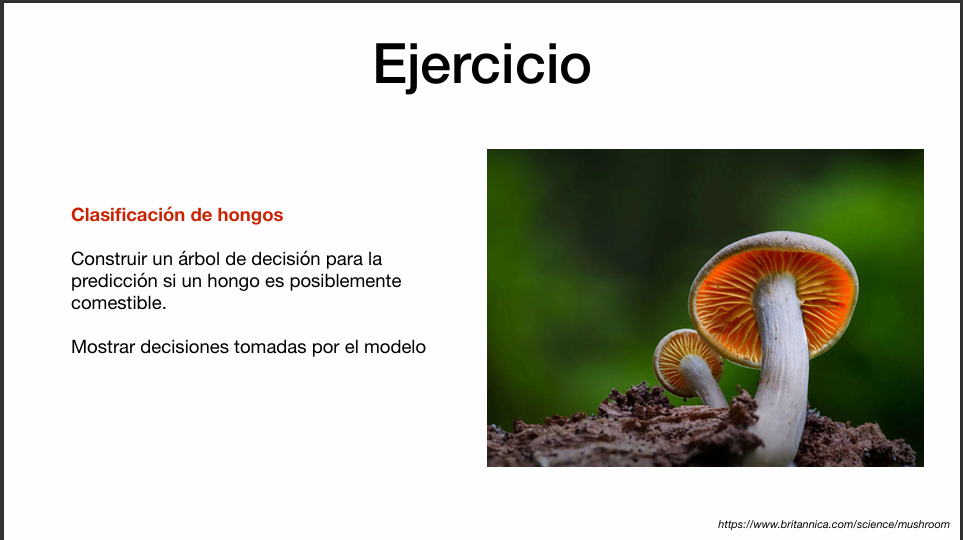

##Importar librerias

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

##Importar datos

In [26]:
data_hongos= pd.read_csv('/content/drive/MyDrive/Clase Visión Computo/Slides/9-slides/mushrooms.csv', sep= ',')
data_hongos

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [27]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data_hongos)
datos = pd.DataFrame(encoded_data, columns=data_hongos.columns)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(datos.drop('class',
                                                               axis=1),
                                                        datos['class'],
                                                         test_size=0.4)

In [49]:
clf = tree.DecisionTreeClassifier(criterion='gini',
                                  min_samples_leaf=1,
                                  min_samples_split=2,)


clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [50]:
prediciones = clf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, prediciones)
print("Accuracy:", accuracy)

Accuracy: 1.0


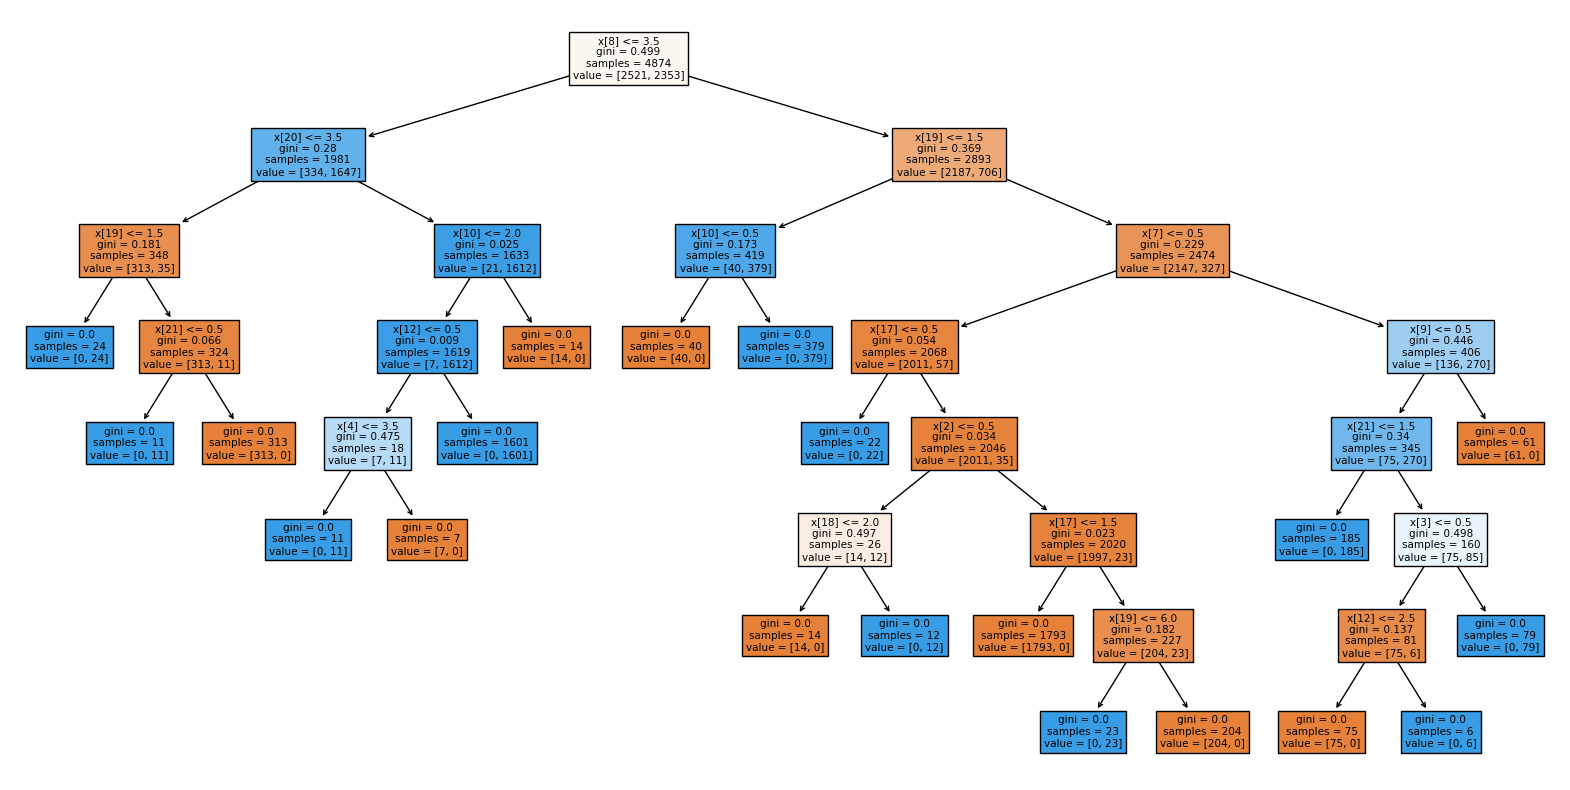

In [52]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True)
plt.show()

Se obtiene una precisión de 1, lo que nos indica una clasificación perfecta, lo que nos da a entender que el problema es muy fácil para el árbol, o también dataset muy pequeño